# Problem 9.4
# Implemetation of K-Means

In [92]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

# 1. K-Means Algorithm

In [129]:
def kmean(input_df, cluster_num, seed):
    """
    This function returns n clusters from input_df.
    It has three inputs:
    1. input_df: the df of training data
    2. cluster_num: integer, the number of clusters
    3. seed: the seed for repulication
    """
    np.random.seed(seed)
    # randomly select n rows in df as initial centroids
    initial_index = np.random.choice(input_df.index, cluster_num, replace=False)
    centroids = [input_df.loc[i].values for i in initial_index]
    
    # initilize two dictionaries to store clustering information
    cluster_output = {'init':[]}
    cluster_dict = {}
    
    while cluster_output != cluster_dict: # when the new clustering 
                                          # is different from the previous one
        # store the new clustering as the old one
        cluster_output = copy.deepcopy(cluster_dict) 
        
        # initilize the new clustering
        cluster_dict = {}
        for i in range(cluster_num):
            cluster_dict[i] = []
            
        # update new clustering
        for i in range(len(input_df)):
            row = input_df.iloc[i].values
            # calculate the euclidean distance of a point to each centroid
            euclidean_distance = [np.sqrt(np.sum((row - centroids[j]) ** 2)) 
                                  for j in range(cluster_num)]
            
            # mark the point as the cluster of its nearest centroid
            index_nearest_centroid = euclidean_distance.index(np.min(euclidean_distance))
            cluster_dict[index_nearest_centroid].append(i)
        
        # update centroids    
        for k in cluster_dict:
            vectors = input_df.iloc[cluster_dict[k]].values
            centroids[k] = np.mean(vectors,axis=0)

    return cluster_output, initial_index  

In [126]:
np.random.seed(0)
np.random.choice([1,2,3,4,5,6,7], 3)

array([5, 6, 1])

In [133]:
np.random.seed(2)
np.random.choice([1,2,3,4,5,6,7], 3)

array([1, 6, 1])

# 2. Train the Model

In [154]:
data = pd.read_csv('../../data/data4.txt', delimiter=' ')

In [138]:
k_means_cluster, init_index = kmean(data, 3, 0)
k_means_cluster

{0: [5, 7, 9, 10, 11, 14, 17, 18, 19, 22, 23, 24, 27, 29],
 1: [0, 1, 3, 21, 25, 26, 28],
 2: [2, 4, 6, 8, 12, 13, 15, 16, 20]}

In [139]:
init_index

array([ 2, 28, 13])

# 3. Visualization

In [140]:
data['class'] = 0
for k in k_means_cluster:
    data['class'].iloc[k_means_cluster[k]] = k

/Users/shen/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [141]:
data.head()

,density,sugar,class
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,2
3,0.608,0.318,1
4,0.556,0.215,2


In [143]:
init_df = data.iloc[init_index]

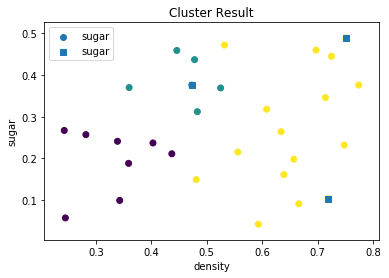

In [150]:
plt.scatter(data.density, data.sugar, c=data['class'], marker='o') # clustering info
plt.scatter(init_df.density, init_df.sugar, marker='s') # initialized centroids
plt.title('Cluster Result')
plt.xlabel('density')
plt.ylabel('sugar')
plt.show()

## 3.1 Try Different Initilized Centroids

In [146]:
k_means_cluster,init_index = kmean(data, 3, 1)
k_means_cluster

{0: [14, 22, 23, 24, 27, 29],
 1: [0, 1, 2, 3, 4, 6, 8, 12, 13, 15, 16, 20, 21, 25, 26, 28],
 2: [5, 7, 9, 10, 11, 17, 18, 19]}

/Users/shen/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


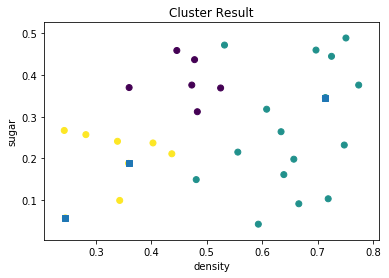

In [147]:
data['class'] = 0
for k in k_means_cluster:
    data['class'].iloc[k_means_cluster[k]] = k
    
    

init_df = data.iloc[init_index]

plt.scatter(data.density, data.sugar, c=data['class'], marker='o') # clustering info
plt.scatter(init_df.density, init_df.sugar, marker='s') # initialized centroids
plt.title('Cluster Result')
plt.xlabel('density')
plt.ylabel('sugar')
plt.show()

/Users/shen/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


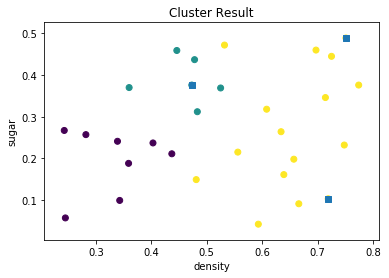

In [149]:
k_means_cluster,init_index = kmean(data, 3, 45)
data['class'] = 0
for k in k_means_cluster:
    data['class'].iloc[k_means_cluster[k]] = k
    
    

init_df = data.iloc[init_index]

plt.scatter(data.density, data.sugar, c=data['class'], marker='o') # initialized centroids
plt.scatter(init_df.density, init_df.sugar, marker='s') # initialized centroids
plt.title('Cluster Result')
plt.xlabel('density')
plt.ylabel('sugar')
plt.show()

## 3.2 Try Different Number of Cluster

In [157]:
k_means_cluster,init_index = kmean(data, 2, 1)
k_means_cluster

{0: [4, 5, 6, 7, 15, 17],
 1: [0,
  1,
  2,
  3,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29]}

/Users/shen/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


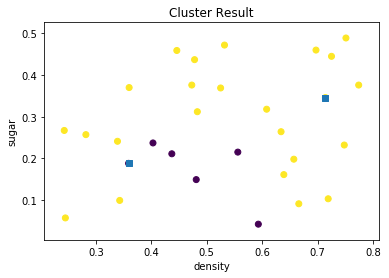

In [158]:
data['class'] = 0
for k in k_means_cluster:
    data['class'].iloc[k_means_cluster[k]] = k
    
    

init_df = data.iloc[init_index]

plt.scatter(data.density, data.sugar, c=data['class'], marker='o') # initialized centroids
plt.scatter(init_df.density, init_df.sugar, marker='s') # initialized centroids
plt.title('Cluster Result')
plt.xlabel('density')
plt.ylabel('sugar')
plt.show()